<a href="https://colab.research.google.com/github/GiovanniReguzzoni/modelliNLP/blob/main/notiBERTonews2epoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import csv

In [ ]:
!pip install datasets transformers huggingface_hub

     |████████████████████████████████| 325 kB 8.0 MB/s 
     |████████████████████████████████| 4.0 MB 65.0 MB/s 
     |████████████████████████████████| 77 kB 7.2 MB/s 
     |████████████████████████████████| 1.1 MB 53.9 MB/s 
     |████████████████████████████████| 212 kB 78.0 MB/s 
     |████████████████████████████████| 136 kB 77.8 MB/s 
     |████████████████████████████████| 127 kB 78.9 MB/s 
     |████████████████████████████████| 895 kB 50.8 MB/s 
     |████████████████████████████████| 596 kB 65.0 MB/s 
     |████████████████████████████████| 6.6 MB 59.3 MB/s 
     |████████████████████████████████| 144 kB 77.8 MB/s 
     |████████████████████████████████| 94 kB 2.8 MB/s 
     |████████████████████████████████| 271 kB 74.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling

In [ ]:
from datasets import Dataset


In [ ]:
dftestl = pd.read_feather('/content/testNewsGoldFEA')

In [ ]:
dftrain = pd.read_feather('/content/trainNewsFEA')

In [ ]:
dftest1 = pd.read_feather('/content/testNewsGoldFEA')

In [ ]:
dftestl.head()

,text,label
0,L’uomo con il naso sulla fronte. Ecco la sua s...,1
1,Pilota dell’US AIR FORCE racconta della caduta...,1
2,"Adesso la testa è qui, dobbiamo battere lo Uni...",0
3,Poi dritto a casa davanti alla tv.,0
4,Adriana Volpe ha partecipato a quella d’inizio...,0


In [ ]:
dftestl.dtypes

text     object
label     int64
dtype: object

In [ ]:
dftrain.dtypes

text     object
label     int64
dtype: object

In [ ]:
dftrain.head()

,text,label
0,Se fosse toccato a me?,0
1,ENORMI oggetti sferici vengono FILMATI vicino ...,1
2,SERVONO 1550 POSTINI:POSTE ITALIANE ASSUME IN ...,1
3,"Napoli, neomelodico canta al contrario: boom d...",1
4,"Papa Francesco: “Non date ascolto a Renzi, il ...",1


In [ ]:
dftrain = dftrain.rename(columns={'text ': 'text'})
dftestl = dftestl.rename(columns={'text ': 'text'})

In [ ]:
dftest1

,text,label
0,L’uomo con il naso sulla fronte. Ecco la sua s...,1
1,Pilota dell’US AIR FORCE racconta della caduta...,1
2,"Adesso la testa è qui, dobbiamo battere lo Uni...",0
3,Poi dritto a casa davanti alla tv.,0
4,Adriana Volpe ha partecipato a quella d’inizio...,0
...,...,...
2715,"AMORE IN CHAT, MA SCOPRE CHE LEI E' SUA...",1
2716,Anche se nulla vieterebbe di escludere che si ...,0
2717,Protesta a Palermo degli oggi in sit-in sotto ...,0
2718,"Napoli, rubata dal cimitero la salma di Giorgi...",1


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
!apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,129 kB of archives.
After this operation, 7,662 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 git-lfs amd64 2.3.4-1 [2,129 kB]
Fetched 2,129 kB in 1s (3,332 kB/s)
Selecting previously unselected package git-lfs.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../git-lfs_2.3.4-1_amd64.deb ...
Unpacking git-lfs (2.3.4-1) ...
Setting up git-lfs (2.3.4-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
# GioReg/notiBERTo

from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("GioReg/notiBERTo")

Downloading:   0%|          | 0.00/636 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/487k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/288k [00:00<?, ?B/s]

In [ ]:
# Preparazione degli input per il modello

def preprocess_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


In [ ]:
#conversione pandas in HFdataframe

train = Dataset.from_pandas(dftrain)
testl = Dataset.from_pandas(dftestl)

In [ ]:
test1 = Dataset.from_pandas(dftestl)

In [ ]:
train.features


{'label': Value(dtype='int64', id=None),
 'text': Value(dtype='string', id=None)}

In [ ]:
tokentrain = train.map(preprocess_function, batched=True)
tokentest = testl.map(preprocess_function, batched=True)

  0%|          | 0/11 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

In [ ]:
#test senza label
tokentest1 = test1.map(preprocess_function, batched=True)

  0%|          | 0/3 [00:00<?, ?ba/s]

In [ ]:
tokentest1

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 2720
})

In [ ]:
# Si usa data_collector per convertire le istanze in tensori PyTorch e concatenarli con padding giusto

from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
# Definzione del modello GioReg/notiBERTo 

from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("GioReg/notiBERTo", num_labels=2)

Downloading:   0%|          | 0.00/319M [00:00<?, ?B/s]

Some weights of the model checkpoint at GioReg/notiBERTo were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at GioReg/notiBERTo and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight']
You s

In [ ]:
# Definizione delle metriche di valutazione
import numpy as np
from datasets import load_metric

def compute_metrics(eval_pred):
    load_accuracy = load_metric("accuracy")
    load_f1 = load_metric("f1")
    
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
    f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
    return {"accuracy": accuracy, "f1": f1}

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [ ]:
# Si definisce un Trainer con gli oggetti costruiti fino a qui

from transformers import TrainingArguments, Trainer

repo_name = "notiBERTonews"

training_args = TrainingArguments(
    output_dir=repo_name,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    save_strategy="epoch", 
    push_to_hub=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokentrain ,
    eval_dataset=tokentest ,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Cloning https://huggingface.co/GioReg/notiBERTonews into local empty directory.


In [ ]:
# Addestramento del modello
trainer.train()

The following columns in the training set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 10879
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1360


Step,Training Loss
500,0.175000
1000,0.115300


Saving model checkpoint to notiBERTonews/checkpoint-680
Configuration saved in notiBERTonews/checkpoint-680/config.json
Model weights saved in notiBERTonews/checkpoint-680/pytorch_model.bin
tokenizer config file saved in notiBERTonews/checkpoint-680/tokenizer_config.json
Special tokens file saved in notiBERTonews/checkpoint-680/special_tokens_map.json
tokenizer config file saved in notiBERTonews/tokenizer_config.json
Special tokens file saved in notiBERTonews/special_tokens_map.json
Saving model checkpoint to notiBERTonews/checkpoint-1360
Configuration saved in notiBERTonews/checkpoint-1360/config.json
Model weights saved in notiBERTonews/checkpoint-1360/pytorch_model.bin
tokenizer config file saved in notiBERTonews/checkpoint-1360/tokenizer_config.json
Special tokens file saved in notiBERTonews/checkpoint-1360/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=1360, training_loss=0.13131488351260914, metrics={'train_runtime': 95.7205, 'train_samples_per_second': 227.308, 'train_steps_per_second': 14.208, 'total_flos': 227514050818620.0, 'train_loss': 0.13131488351260914, 'epoch': 2.0})

In [ ]:
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2720
  Batch size = 16


{'epoch': 2.0,
 'eval_accuracy': 0.9742647058823529,
 'eval_f1': 0.9736247174076864,
 'eval_loss': 0.08877681940793991,
 'eval_runtime': 4.1831,
 'eval_samples_per_second': 650.242,
 'eval_steps_per_second': 40.64}

# Performing Inference


In [ ]:
trainer.push_to_hub()



Saving model checkpoint to AlbertoBertnews
Configuration saved in AlbertoBertnews/config.json
Model weights saved in AlbertoBertnews/pytorch_model.bin
tokenizer config file saved in AlbertoBertnews/tokenizer_config.json
Special tokens file saved in AlbertoBertnews/special_tokens_map.json
Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 3.34k/703M [00:00<?, ?B/s]

Upload file runs/Apr06_12-00-19_a775e6b2b5c8/events.out.tfevents.1649246664.a775e6b2b5c8.71.2: 100%|##########…

Upload file runs/Apr06_12-00-19_a775e6b2b5c8/events.out.tfevents.1649246447.a775e6b2b5c8.71.0:  82%|########2 …

To https://huggingface.co/GioReg/AlbertoBertnews
   1b53bfb..221e5b6  main -> main

Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Text Classification', 'type': 'text-classification'}, 'metrics': [{'name': 'Accuracy', 'type': 'accuracy', 'value': 0.9639705882352941}, {'name': 'F1', 'type': 'f1', 'value': 0.9635416666666667}]}
To https://huggingface.co/GioReg/AlbertoBertnews
   221e5b6..cae8dea  main -> main



'https://huggingface.co/GioReg/AlbertoBertnews/commit/221e5b6a925fb20929fe54baaa0919fa056520a0'

In [ ]:
pip install transformers


In [ ]:
from transformers import pipeline


In [ ]:
sentiment_model = pipeline(model="GioReg/notiBERTo")

Downloading:   0%|          | 0.00/755 [00:00<?, ?B/s]

loading configuration file https://huggingface.co/GioReg/notiBERTo/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/11c27dfa47b7a6deb3281c9818c4b715d90f4224ef23d691a000b892f1db3c92.7ea9e40ee3d21d171e23c450c7bdac6b2e8a62b1ebe84161097ebdb882dff344
Model config RobertaConfig {
  "_name_or_path": "GioReg/notiBERTo",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.18.0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 52000
}

loading configuration f

In [ ]:
sentiment_model = pipeline(task= 'sentiment-analysis', 
                      model= "/content/notiBERTonews",
                      tokenizer = "/content/notiBERTonews")

loading configuration file /content/notiBERTonews/config.json
Model config RobertaConfig {
  "_name_or_path": "/content/notiBERTonews",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.18.0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 52000
}

loading configuration file /content/notiBERTonews/config.json
Model config RobertaConfig {
  "_name_or_path": "/content/notiBERTonews",
  "architectures": [
    "Robe

In [ ]:
sentiment_model(["Malaria? E' solo l'inizio.... La tremenda"])

[{'label': 'LABEL_1', 'score': 0.9994407296180725}]

In [ ]:
list_text = dftest1.text.tolist()

In [ ]:
df = pd.DataFrame

In [ ]:
listat ={}

In [ ]:
listat= sentiment_model(list_text)

In [ ]:
listat

[{'label': 'LABEL_1', 'score': 0.9995152950286865},
 {'label': 'LABEL_1', 'score': 0.9990978240966797},
 {'label': 'LABEL_0', 'score': 0.9995984435081482},
 {'label': 'LABEL_0', 'score': 0.9998095631599426},
 {'label': 'LABEL_0', 'score': 0.9992079138755798},
 {'label': 'LABEL_1', 'score': 0.9998846054077148},
 {'label': 'LABEL_1', 'score': 0.9997138381004333},
 {'label': 'LABEL_1', 'score': 0.9998993873596191},
 {'label': 'LABEL_0', 'score': 0.9997609257698059},
 {'label': 'LABEL_1', 'score': 0.9997944235801697},
 {'label': 'LABEL_0', 'score': 0.9997550845146179},
 {'label': 'LABEL_0', 'score': 0.9997681975364685},
 {'label': 'LABEL_0', 'score': 0.9997945427894592},
 {'label': 'LABEL_0', 'score': 0.523187518119812},
 {'label': 'LABEL_0', 'score': 0.9931558966636658},
 {'label': 'LABEL_1', 'score': 0.9998316764831543},
 {'label': 'LABEL_0', 'score': 0.9994805455207825},
 {'label': 'LABEL_0', 'score': 0.9177023768424988},
 {'label': 'LABEL_1', 'score': 0.9998546838760376},
 {'label': 'L

In [ ]:
#listat= [{'label': 'LABEL_0', 'score': 0.9767665863037109},


In [ ]:
print(listat)

[{'label': 'LABEL_1', 'score': 0.9991101622581482}, {'label': 'LABEL_1', 'score': 0.9983243346214294}, {'label': 'LABEL_0', 'score': 0.9792740941047668}, {'label': 'LABEL_0', 'score': 0.9980588555335999}, {'label': 'LABEL_0', 'score': 0.9976047277450562}, {'label': 'LABEL_1', 'score': 0.9994502663612366}, {'label': 'LABEL_1', 'score': 0.9989882111549377}, {'label': 'LABEL_1', 'score': 0.9996448755264282}, {'label': 'LABEL_0', 'score': 0.9989054203033447}, {'label': 'LABEL_1', 'score': 0.9984232187271118}, {'label': 'LABEL_0', 'score': 0.9989103078842163}, {'label': 'LABEL_0', 'score': 0.998971700668335}, {'label': 'LABEL_0', 'score': 0.9987452030181885}, {'label': 'LABEL_0', 'score': 0.9978368878364563}, {'label': 'LABEL_0', 'score': 0.9980583786964417}, {'label': 'LABEL_1', 'score': 0.9993940591812134}, {'label': 'LABEL_0', 'score': 0.9986512064933777}, {'label': 'LABEL_0', 'score': 0.9875010251998901}, {'label': 'LABEL_1', 'score': 0.9996205568313599}, {'label': 'LABEL_0', 'score': 0

In [ ]:
df = pd.DataFrame.from_dict(listat)

In [ ]:
df.head()

,label,score
0,LABEL_1,0.999110
1,LABEL_1,0.998324
2,LABEL_0,0.979274
3,LABEL_0,0.998059
4,LABEL_0,0.997605


In [ ]:
df['label'] = df['label'].str.replace('LABEL_', '')

In [ ]:
df.head(6)

,label,score
0,1,0.999110
1,1,0.998324
2,0,0.979274
3,0,0.998059
4,0,0.997605
5,1,0.999450


In [ ]:
df = df.rename(columns={'label': 'predizione'})

In [ ]:
dftestl.head()

,text,label
0,L’uomo con il naso sulla fronte. Ecco la sua s...,1
1,Pilota dell’US AIR FORCE racconta della caduta...,1
2,"Adesso la testa è qui, dobbiamo battere lo Uni...",0
3,Poi dritto a casa davanti alla tv.,0
4,Adriana Volpe ha partecipato a quella d’inizio...,0


In [ ]:
result=pd.concat([dftestl, df], axis=1)

In [ ]:
result.head(20)

,text,label,predizione,score
0,L’uomo con il naso sulla fronte. Ecco la sua s...,1,1,0.999110
1,Pilota dell’US AIR FORCE racconta della caduta...,1,1,0.998324
2,"Adesso la testa è qui, dobbiamo battere lo Uni...",0,0,0.979274
3,Poi dritto a casa davanti alla tv.,0,0,0.998059
4,Adriana Volpe ha partecipato a quella d’inizio...,0,0,0.997605
5,"Bonus vacanze, arriva la svolta: potrà essere ...",1,1,0.999450
6,“Quando siamo partiti non c’era la quarantena!...,1,1,0.998988
7,SEDICENNE FA SESSO IN SPIAGGIA:MIGLIAIA DI CON...,1,1,0.999645
8,Le vittime non non sono cadute nel raggiro dei...,0,0,0.998905
9,L'INPS si attiverà per recuperare gli importi ...,1,1,0.998423


In [ ]:
result.dtypes

text           object
label           int64
predizione     object
score         float64
dtype: object

In [ ]:
result["predizione"] = pd.to_numeric(df["predizione"])

In [ ]:
result.dtypes

text           object
label           int64
predizione      int64
score         float64
dtype: object

In [ ]:
#accuracy
from sklearn import metrics
metrics.accuracy_score(result['label'], result['predizione'])

0.9694852941176471

In [ ]:
#precision
from sklearn.metrics import precision_score
precision_score(result['label'], result['predizione'],  average='macro')


0.9694609819923543

In [ ]:
#calcolo recall NB
from sklearn.metrics import recall_score

recall_score(result['label'], result['predizione'],  average='macro')

0.9694952580388356

In [ ]:
 from sklearn.metrics import f1_score
#f1
f1_score(result['label'], result['predizione'], average='macro')

0.969476939717091

In [ ]:
 from sklearn.metrics import confusion_matrix

In [ ]:
array=confusion_matrix(result['label'], result['predizione'],)
# (tn, fp, fn, tp)
array

array([[1341,   43],
       [  40, 1296]])

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

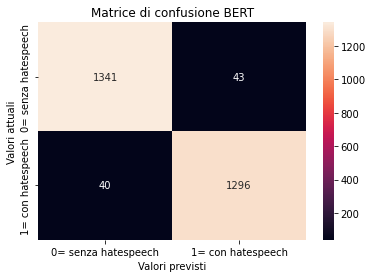

In [ ]:
ax= plt.subplot()
sns.heatmap(array, annot=True, fmt='g', ax=ax);  



ax.set_xlabel('');ax.set_ylabel('Valori attuali'); 
ax.set_xlabel('');ax.set_xlabel('Valori previsti'); 

ax.set_title('Matrice di confusione BERT'); 
ax.xaxis.set_ticklabels(['0= senza hatespeech', '1= con hatespeech']); ax.yaxis.set_ticklabels(['0= senza hatespeech', '1= con hatespeech']);

In [ ]:
conditions = [result['label'] == result['predizione'], result['label'] != result['predizione']]


choices = ['corretta','sbagliata']

result['risultato'] = np.select(conditions, choices, default='Errore')

result.head(20)

,text,label,predizione,score,risultato
0,L’uomo con il naso sulla fronte. Ecco la sua s...,1,1,0.999110,corretta
1,Pilota dell’US AIR FORCE racconta della caduta...,1,1,0.998324,corretta
2,"Adesso la testa è qui, dobbiamo battere lo Uni...",0,0,0.979274,corretta
3,Poi dritto a casa davanti alla tv.,0,0,0.998059,corretta
4,Adriana Volpe ha partecipato a quella d’inizio...,0,0,0.997605,corretta
5,"Bonus vacanze, arriva la svolta: potrà essere ...",1,1,0.999450,corretta
6,“Quando siamo partiti non c’era la quarantena!...,1,1,0.998988,corretta
7,SEDICENNE FA SESSO IN SPIAGGIA:MIGLIAIA DI CON...,1,1,0.999645,corretta
8,Le vittime non non sono cadute nel raggiro dei...,0,0,0.998905,corretta
9,L'INPS si attiverà per recuperare gli importi ...,1,1,0.998423,corretta


In [ ]:
result['risultato'].value_counts()

corretta     2637
sbagliata      83
Name: risultato, dtype: int64

In [ ]:
x=result['risultato'].value_counts()

In [ ]:
x[0] / (x[0]+x[1])

0.9694852941176471

In [ ]:
pip install disarray

In [ ]:
import disarray

In [ ]:
df = pd.DataFrame(array, index= ['0','1'], columns=['0','1'])

In [ ]:
df.da.export_metrics()

,0,1,micro-average
accuracy,0.969485,0.969485,0.969485
f1,0.969982,0.968972,0.969485
false_discovery_rate,0.028965,0.032114,0.030515
false_negative_rate,0.031069,0.029940,0.030515
false_positive_rate,0.029940,0.031069,0.030515
negative_predictive_value,0.967886,0.971035,0.969485
positive_predictive_value,0.971035,0.967886,0.969485
precision,0.971035,0.967886,0.969485
recall,0.968931,0.970060,0.969485
sensitivity,0.968931,0.970060,0.969485
